In [1]:
# import important library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load the dataset
customers  = pd.read_csv('olist_customers_dataset.csv')
locations = pd.read_csv('olist_geolocation_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
payments = pd.read_csv('olist_order_payments_dataset.csv')
reviews = pd.read_csv('olist_order_reviews_dataset.csv', sep= ';')
orders = pd.read_csv('olist_orders_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')

In [3]:
pd.options.display.max_columns = 99

#### There are to many variable of the data, so we will selecting the useful variable to analyzed and visualized

In [4]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [5]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [6]:
customers[['customer_city', 'customer_state']].nunique()

customer_city     4119
customer_state      27
dtype: int64

In [7]:
# concat orders and customer city
sales = orders.merge(customers[['customer_id', 'customer_state']], on='customer_id')
sales.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,SP


In [8]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [9]:
sales = sales.merge(payments, on = 'order_id')
sales.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_state,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,SP,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,SP,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,SP,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,BA,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,GO,1,credit_card,3,179.12


In [10]:
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,18/01/2018 00:00,18/01/2018 21:46
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,10/03/2018 00:00,11/03/2018 03:05
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,17/02/2018 00:00,18/02/2018 14:36
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,21/04/2017 00:00,21/04/2017 22:02
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,01/03/2018 00:00,02/03/2018 10:26


In [11]:
sales = sales.merge(reviews[['order_id', 'review_score']], on='order_id')
sales.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_state,payment_sequential,payment_type,payment_installments,payment_value,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,SP,1,credit_card,1,18.12,4
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,SP,3,voucher,1,2.00,4
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,SP,2,voucher,1,18.59,4
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,BA,1,boleto,1,141.46,4
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,GO,1,credit_card,3,179.12,5


In [12]:
# total payment in sales same as total payment on order_items so we don't need to merge them
sales[sales['order_id'] == 'e481f51cbdc54678b7cc49136f2d6af7']['payment_value'].sum()

38.71

In [13]:
order_items[order_items['order_id'] == 'e481f51cbdc54678b7cc49136f2d6af7']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
100785,e481f51cbdc54678b7cc49136f2d6af7,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72


In [14]:
order_items['order_item_id'].nunique()

21

In [15]:
sales = sales.merge(order_items[['order_id', 'order_item_id', 'product_id', 'seller_id']], on='order_id')
sales.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_state,payment_sequential,payment_type,payment_installments,payment_value,review_score,order_item_id,product_id,seller_id
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,SP,1,credit_card,1,18.12,4,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,SP,3,voucher,1,2.00,4,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,SP,2,voucher,1,18.59,4,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,BA,1,boleto,1,141.46,4,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,GO,1,credit_card,3,179.12,5,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2


In [16]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [17]:
sales = sales.merge(products[['product_id', 'product_category_name']], on='product_id')
sales.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_state,payment_sequential,payment_type,payment_installments,payment_value,review_score,order_item_id,product_id,seller_id,product_category_name
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,SP,1,credit_card,1,18.12,4,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,utilidades_domesticas
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,SP,3,voucher,1,2.00,4,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,utilidades_domesticas
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,SP,2,voucher,1,18.59,4,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,utilidades_domesticas
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,SP,1,credit_card,3,37.77,4,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,utilidades_domesticas
4,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13 00:00:00,SC,1,boleto,1,44.09,3,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,utilidades_domesticas


In [18]:
sales['product_category_name'].nunique()

73

In [19]:
product_name = pd.read_csv('product_category_name_translation.csv')
product_name.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [20]:
sales = sales.merge(product_name, on= 'product_category_name')

In [21]:
sales.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_state,payment_sequential,payment_type,payment_installments,payment_value,review_score,order_item_id,product_id,seller_id,product_category_name,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,SP,1,credit_card,1,18.12,4,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,utilidades_domesticas,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,SP,3,voucher,1,2.00,4,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,utilidades_domesticas,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,SP,2,voucher,1,18.59,4,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,utilidades_domesticas,housewares
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,SP,1,credit_card,3,37.77,4,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,utilidades_domesticas,housewares
4,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13 00:00:00,SC,1,boleto,1,44.09,3,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,utilidades_domesticas,housewares


In [22]:
sales.drop(['product_id',  
            'product_category_name', 
            'customer_id'],
           axis=1, inplace= True)

In [23]:
sales.head()

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_state,payment_sequential,payment_type,payment_installments,payment_value,review_score,order_item_id,seller_id,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,SP,1,credit_card,1,18.12,4,1,3504c0cb71d7fa48d967e0e4c94d59d9,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,SP,3,voucher,1,2.00,4,1,3504c0cb71d7fa48d967e0e4c94d59d9,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,SP,2,voucher,1,18.59,4,1,3504c0cb71d7fa48d967e0e4c94d59d9,housewares
3,128e10d95713541c87cd1a2e48201934,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,SP,1,credit_card,3,37.77,4,1,3504c0cb71d7fa48d967e0e4c94d59d9,housewares
4,bfc39df4f36c3693ff3b63fcbea9e90a,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13 00:00:00,SC,1,boleto,1,44.09,3,1,3504c0cb71d7fa48d967e0e4c94d59d9,housewares


In [24]:
sales.to_csv('sales.csv', index=False)

In [25]:
data= sales.copy()

In [26]:
data.isna().sum()

order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  11
order_delivered_carrier_date     1097
order_delivered_customer_date    2224
order_estimated_delivery_date       0
customer_state                      0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
review_score                        0
order_item_id                       0
seller_id                           0
product_category_name_english       0
dtype: int64

C:\Users\62812\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='order_status', ylabel='count'>

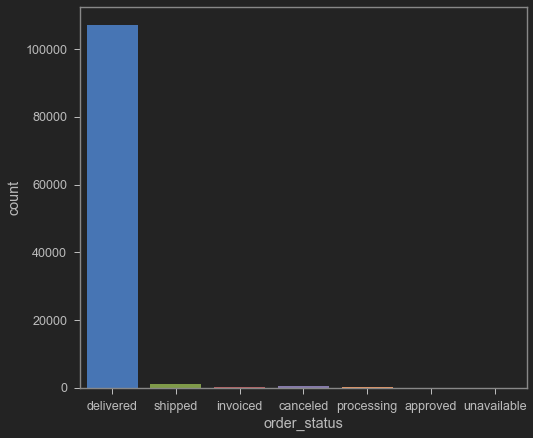

In [27]:
sns.countplot(data['order_status'])

In [28]:
data.shape

(109268, 16)

<AxesSubplot:xlabel='customer_state'>

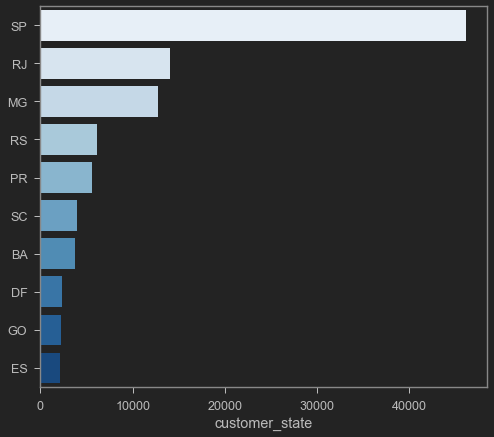

In [29]:
sns.barplot(x= data['customer_state'].value_counts().head(10), y= data['customer_state'].value_counts().head(10).index, palette= 'Blues')

In [30]:
data.head()

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_state,payment_sequential,payment_type,payment_installments,payment_value,review_score,order_item_id,seller_id,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,SP,1,credit_card,1,18.12,4,1,3504c0cb71d7fa48d967e0e4c94d59d9,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,SP,3,voucher,1,2.00,4,1,3504c0cb71d7fa48d967e0e4c94d59d9,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,SP,2,voucher,1,18.59,4,1,3504c0cb71d7fa48d967e0e4c94d59d9,housewares
3,128e10d95713541c87cd1a2e48201934,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,SP,1,credit_card,3,37.77,4,1,3504c0cb71d7fa48d967e0e4c94d59d9,housewares
4,bfc39df4f36c3693ff3b63fcbea9e90a,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13 00:00:00,SC,1,boleto,1,44.09,3,1,3504c0cb71d7fa48d967e0e4c94d59d9,housewares


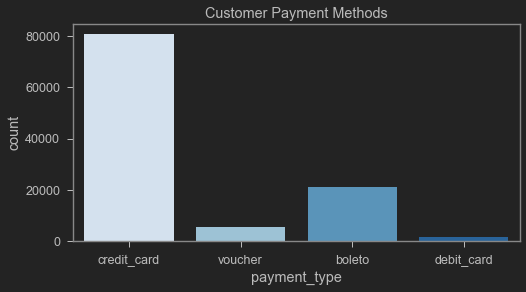

In [31]:
plt.figure(figsize= (8,4))
sns.countplot(x= data['payment_type'], palette= 'Blues')
plt.title('Customer Payment Methods')
plt.show()

In [32]:
payment = data.groupby('order_id')['payment_sequential'].max().reset_index().sort_values(by='payment_sequential',ascending= False)
print(f"{round(len(payment[payment['payment_sequential'] > 1 ])/len(payment)*100)}% Customer using split payment")
print(f"{round(len(payment[payment['payment_sequential'] == 1 ])/len(payment)*100)}% Customer using cash payment")

3% Customer using split payment
97% Customer using cash payment


In [33]:
data = data.rename(columns={'product_category_name_english': 'product_category'})

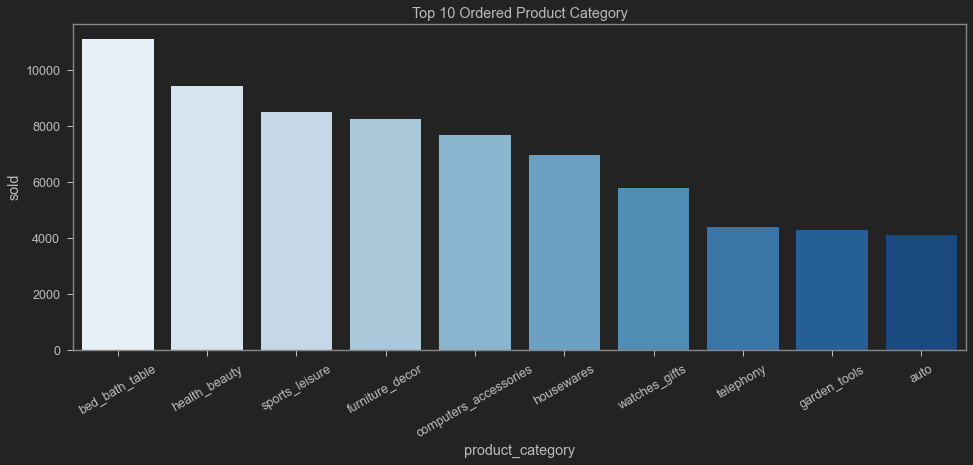

In [34]:
top_category = data['product_category'].value_counts().reset_index()
top_category.columns = ['product_category', 'sold']
plt.figure(figsize= (16,6))
sns.barplot(x= top_category.head(10)['product_category'], y=top_category.head(10)['sold'], palette= 'Blues')
plt.title('Top 10 Ordered Product Category')
plt.xticks(rotation=30)
plt.show()

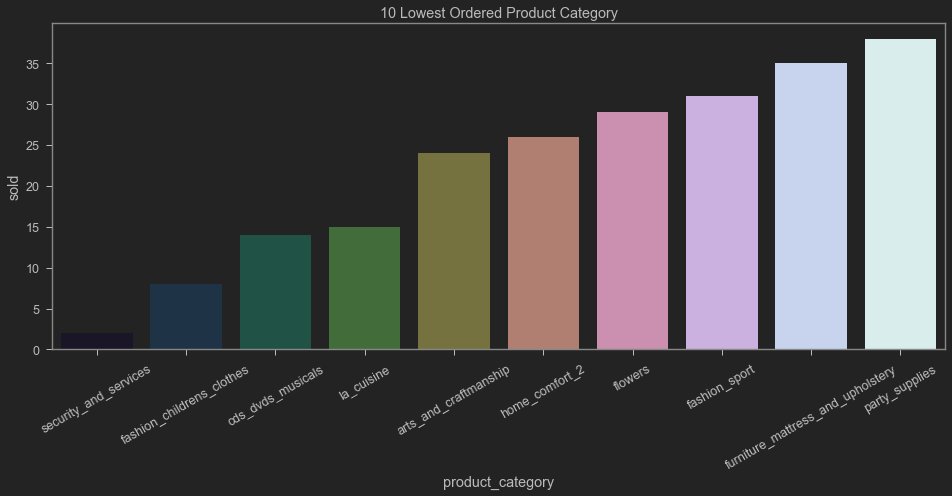

In [35]:
top_category = data['product_category'].value_counts().sort_values().reset_index()
top_category.columns = ['product_category', 'sold']
plt.figure(figsize= (16,6))
sns.barplot(x= top_category.head(10)['product_category'], y=top_category.head(10)['sold'], palette= 'cubehelix')
plt.title('10 Lowest Ordered Product Category')
plt.xticks(rotation=30)
plt.show()

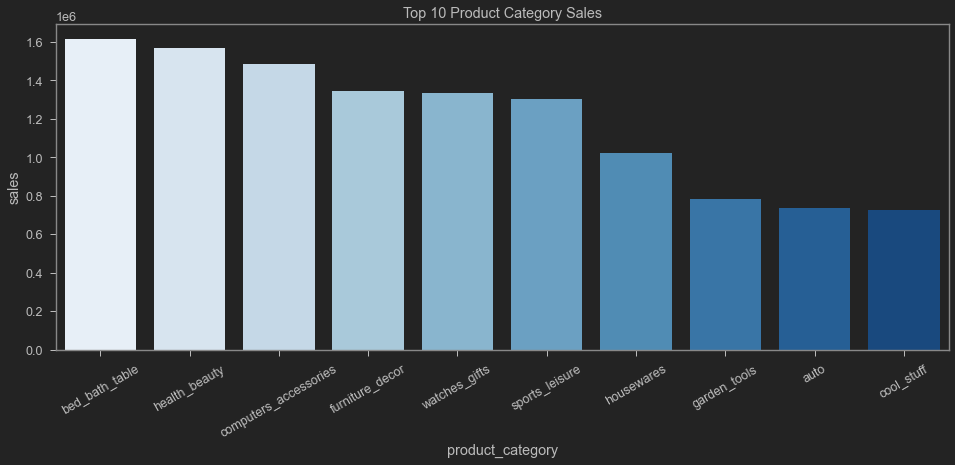

In [36]:
top_category_sales = data.groupby('product_category').sum()['payment_value'].reset_index().sort_values(by= 'payment_value', ascending= False)
top_category_sales.columns = ['product_category', 'sales']
plt.figure(figsize= (16,6))
sns.barplot(x= top_category_sales.head(10)['product_category'], y=top_category_sales.head(10)['sales'], palette= 'Blues')
plt.title('Top 10 Product Category Sales')
plt.xticks(rotation=30)
plt.show()

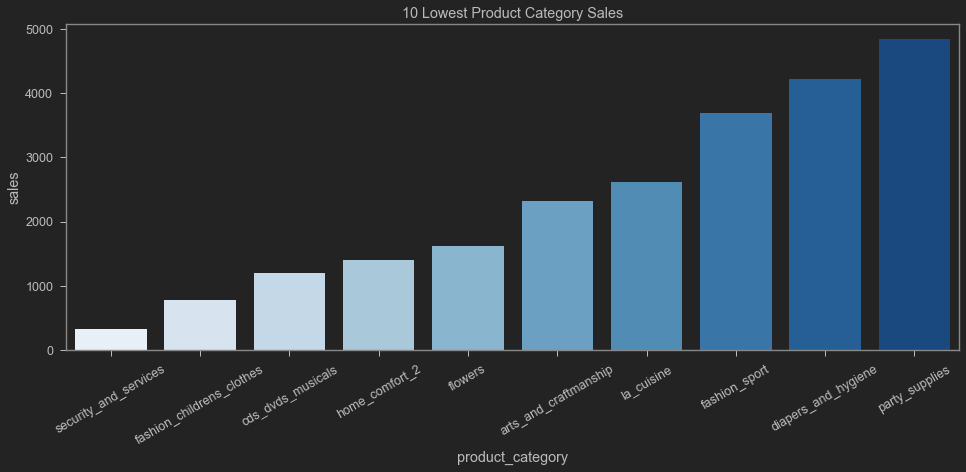

In [37]:
top_category_sales = data.groupby('product_category').sum()['payment_value'].reset_index().sort_values(by= 'payment_value')
top_category_sales.columns = ['product_category', 'sales']
plt.figure(figsize= (16,6))
sns.barplot(x= top_category_sales.head(10)['product_category'], y=top_category_sales.head(10)['sales'], palette= 'Blues')
plt.title('10 Lowest Product Category Sales')
plt.xticks(rotation=30)
plt.show()

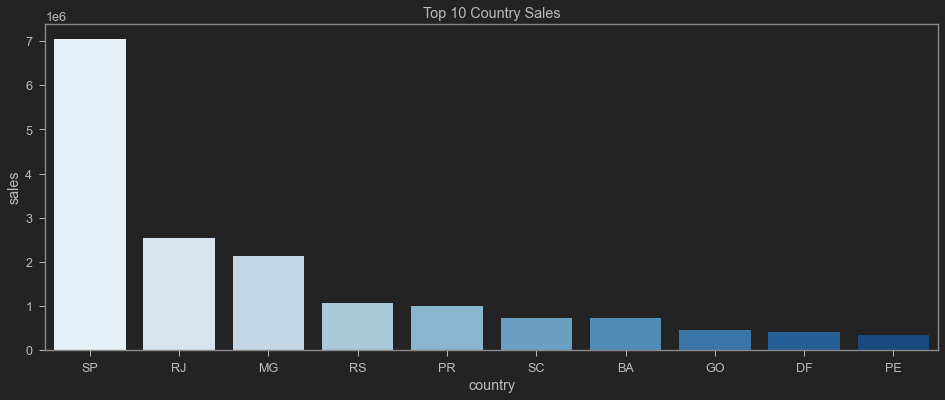

In [38]:
top_country_sales = data.groupby('customer_state').sum()['payment_value'].reset_index().sort_values(by= 'payment_value', ascending= False)
top_country_sales.columns = ['country', 'sales']
plt.figure(figsize= (16,6))
sns.barplot(x= top_country_sales.head(10)['country'], y=top_country_sales.head(10)['sales'], palette= 'Blues')
plt.title('Top 10 Country Sales')
plt.show()

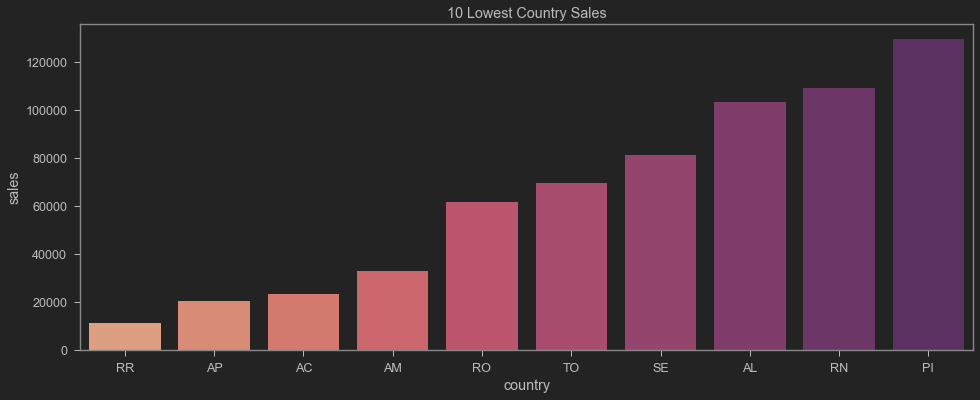

In [39]:
top_country_sales = data.groupby('customer_state').sum()['payment_value'].reset_index().sort_values(by= 'payment_value')
top_country_sales.columns = ['country', 'sales']
plt.figure(figsize= (16,6))
sns.barplot(x= top_country_sales.head(10)['country'], y=top_country_sales.head(10)['sales'], palette= 'flare')
plt.title('10 Lowest Country Sales')
plt.show()

In [40]:
data.select_dtypes('object')

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_state,payment_type,review_score,seller_id,product_category
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,SP,credit_card,4,3504c0cb71d7fa48d967e0e4c94d59d9,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,SP,voucher,4,3504c0cb71d7fa48d967e0e4c94d59d9,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,SP,voucher,4,3504c0cb71d7fa48d967e0e4c94d59d9,housewares
3,128e10d95713541c87cd1a2e48201934,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,SP,credit_card,4,3504c0cb71d7fa48d967e0e4c94d59d9,housewares
4,bfc39df4f36c3693ff3b63fcbea9e90a,delivered,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13 00:00:00,SC,boleto,3,3504c0cb71d7fa48d967e0e4c94d59d9,housewares
...,...,...,...,...,...,...,...,...,...,...,...,...
109263,0b82d0616f1ad8da15cf967b984b4004,delivered,2018-08-03 21:35:53,2018-08-04 04:25:14,2018-08-08 14:26:00,2018-08-09 21:42:08,2018-08-10 00:00:00,MG,boleto,5,2cb6eb1b7185064167657fa09f541105,arts_and_craftmanship
109264,2ef4a11b6e24fdfbb43b92cb5f95edff,delivered,2018-07-23 18:35:14,2018-07-24 10:31:25,2018-07-24 14:37:00,2018-07-27 14:04:10,2018-08-06 00:00:00,SP,credit_card,3,ef728fa1f17436c91ed1ccd03dcf9631,arts_and_craftmanship
109265,2ef4a11b6e24fdfbb43b92cb5f95edff,delivered,2018-07-23 18:35:14,2018-07-24 10:31:25,2018-07-24 14:37:00,2018-07-27 14:04:10,2018-08-06 00:00:00,SP,credit_card,3,ef728fa1f17436c91ed1ccd03dcf9631,arts_and_craftmanship
109266,2c4ada2e75c2ad41dd93cebb5df5f023,delivered,2017-01-26 11:09:00,2017-01-26 11:22:17,2017-01-27 14:59:35,2017-02-14 16:24:01,2017-03-07 00:00:00,RO,credit_card,4,48162d548f5b1b11b9d29d1e01f75a61,security_and_services


In [41]:
data['order_status'] = data['order_status'].map({'delivered':1, 'shipped':0})

In [42]:
data.head()

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_state,payment_sequential,payment_type,payment_installments,payment_value,review_score,order_item_id,seller_id,product_category
0,e481f51cbdc54678b7cc49136f2d6af7,1.0,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,SP,1,credit_card,1,18.12,4,1,3504c0cb71d7fa48d967e0e4c94d59d9,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,1.0,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,SP,3,voucher,1,2.00,4,1,3504c0cb71d7fa48d967e0e4c94d59d9,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,1.0,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,SP,2,voucher,1,18.59,4,1,3504c0cb71d7fa48d967e0e4c94d59d9,housewares
3,128e10d95713541c87cd1a2e48201934,1.0,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,SP,1,credit_card,3,37.77,4,1,3504c0cb71d7fa48d967e0e4c94d59d9,housewares
4,bfc39df4f36c3693ff3b63fcbea9e90a,1.0,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13 00:00:00,SC,1,boleto,1,44.09,3,1,3504c0cb71d7fa48d967e0e4c94d59d9,housewares


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109268 entries, 0 to 109267
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       109268 non-null  object 
 1   order_status                   108110 non-null  float64
 2   order_purchase_timestamp       109268 non-null  object 
 3   order_approved_at              109257 non-null  object 
 4   order_delivered_carrier_date   108171 non-null  object 
 5   order_delivered_customer_date  107044 non-null  object 
 6   order_estimated_delivery_date  109268 non-null  object 
 7   customer_state                 109268 non-null  object 
 8   payment_sequential             109268 non-null  int64  
 9   payment_type                   109268 non-null  object 
 10  payment_installments           109268 non-null  int64  
 11  payment_value                  109268 non-null  float64
 12  review_score                  

In [44]:
datetime = ['order_purchase_timestamp','order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date']
for col in datetime:
    data[col] = pd.to_datetime(data[col])

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109268 entries, 0 to 109267
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       109268 non-null  object        
 1   order_status                   108110 non-null  float64       
 2   order_purchase_timestamp       109268 non-null  datetime64[ns]
 3   order_approved_at              109257 non-null  datetime64[ns]
 4   order_delivered_carrier_date   108171 non-null  datetime64[ns]
 5   order_delivered_customer_date  107044 non-null  datetime64[ns]
 6   order_estimated_delivery_date  109268 non-null  datetime64[ns]
 7   customer_state                 109268 non-null  object        
 8   payment_sequential             109268 non-null  int64         
 9   payment_type                   109268 non-null  object        
 10  payment_installments           109268 non-null  int64         
 11  

In [46]:
data['response_time'] = data['order_approved_at'] - data['order_purchase_timestamp']
data['response_time'] = data['response_time'].apply(lambda x: x.total_seconds() / 60)

In [47]:
data.head()

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_state,payment_sequential,payment_type,payment_installments,payment_value,review_score,order_item_id,seller_id,product_category,response_time
0,e481f51cbdc54678b7cc49136f2d6af7,1.0,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,SP,1,credit_card,1,18.12,4,1,3504c0cb71d7fa48d967e0e4c94d59d9,housewares,10.700000
1,e481f51cbdc54678b7cc49136f2d6af7,1.0,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,SP,3,voucher,1,2.00,4,1,3504c0cb71d7fa48d967e0e4c94d59d9,housewares,10.700000
2,e481f51cbdc54678b7cc49136f2d6af7,1.0,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,SP,2,voucher,1,18.59,4,1,3504c0cb71d7fa48d967e0e4c94d59d9,housewares,10.700000
3,128e10d95713541c87cd1a2e48201934,1.0,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28,SP,1,credit_card,3,37.77,4,1,3504c0cb71d7fa48d967e0e4c94d59d9,housewares,95.750000
4,bfc39df4f36c3693ff3b63fcbea9e90a,1.0,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13,SC,1,boleto,1,44.09,3,1,3504c0cb71d7fa48d967e0e4c94d59d9,housewares,1607.416667


In [48]:
fast_responses_seller= data.groupby('seller_id').mean()[['response_time']].sort_values(by = 'response_time').head(14).reset_index()
print('Most Responsive Sellers')
print(fast_responses_seller)

Most Responsive Sellers
                           seller_id  response_time
0   a45765f8afb1e594b22bf9e974b46765            0.0
1   0b46f784306be7200ca1700aa55d819f            0.0
2   5d043cd5512d4bd2f88e5ccdd5736c38            0.0
3   4ddeb3e828550cddc8d45c8bc36ab2d1            0.0
4   8501d82f68d23148b6d78bb7c4a42037            0.0
5   7e26c750b4cb9f6766f58265ff9ebe95            0.0
6   2cb4700db635baa1c0d4f90ed27b6669            0.0
7   77128dec4bec4878c37ab7d6169d6f26            0.0
8   2d8cfba3fcd3170555941605edaa196a            0.0
9   80cfd480be3eb6d6267139f5cb793555            0.0
10  df683dfda87bf71ac3fc63063fba369d            0.0
11  720e6cf846ea7572cbb66b743fb91e6c            0.0
12  baf15155e37ef5492731459bdc05be8a            0.0
13  00ab3eff1b5192e5f1a63bcecfee11c8            0.0


In [49]:
fast_responses_seller= data.groupby('seller_id').mean()[['response_time']].sort_values(by = 'response_time', ascending= False).head(10).reset_index()
print('Most Slow Responses Sellers')
print(fast_responses_seller)

Most Slow Responses Sellers
                          seller_id  response_time
0  5444b12c82f21c923f2639ebc722c1ea    8347.116667
1  9c57bc60cfad5ee62d35d3f1ce4593a1    7739.500000
2  f63d8f293af3a6454377546bd9dd19ff    7110.780357
3  278b6e0b20c4f61fefaa0577943d7a35    6844.150000
4  babcc0ab201e4c60188427cae51a5b8b    6114.700000
5  7f02656561b680def9986c0795a8a080    5216.383333
6  b5d034ac251546e25afe9067f05c1539    5148.966667
7  6861de0f40cacb0602e473c51639f980    5141.193750
8  101921376b577a4540dc30e9009133ca    5020.650000
9  96e5dc09087bad639b4ee193104ec2e5    5012.975000


In [50]:
monthly_sales = data.groupby(data['order_purchase_timestamp'].dt.to_period('M')).sum()['payment_value'].reset_index()
monthly_sales.columns = ['year_month', 'sales']
monthly_sales['year_month'] = monthly_sales['year_month'].astype('str')
monthly_sales.head()

,year_month,sales
0,2016-09,347.52
1,2016-10,61946.06
2,2016-12,19.62
3,2017-01,180027.55
4,2017-02,307200.00


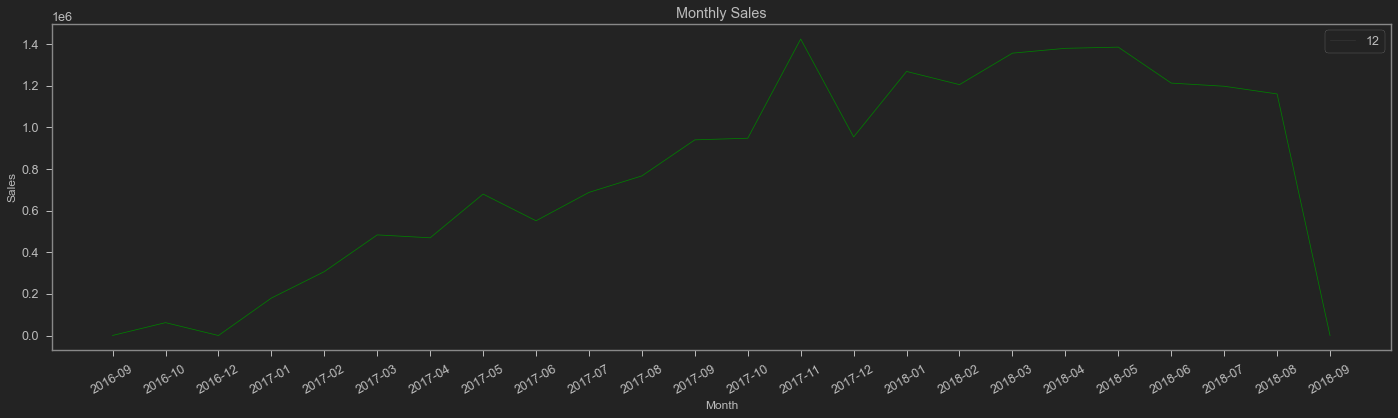

In [51]:
plt.figure(figsize=(24,6))
sns.lineplot(x= monthly_sales['year_month'], y= monthly_sales['sales'],  size=12, color= 'green')
plt.title('Monthly Sales')
plt.xticks(rotation=30)
plt.xlabel('Month', size=12)
plt.ylabel('Sales', size=12)
plt.show()

In [52]:
monthly_order = data.groupby(data['order_purchase_timestamp'].dt.to_period('M')).count()['order_id'].reset_index()
monthly_order.columns = ['year_month', 'order']
monthly_order['year_month'] = monthly_sales['year_month'].astype('str')
monthly_order.head()

,year_month,order
0,2016-09,3
1,2016-10,333
2,2016-12,1
3,2017-01,958
4,2017-02,1878


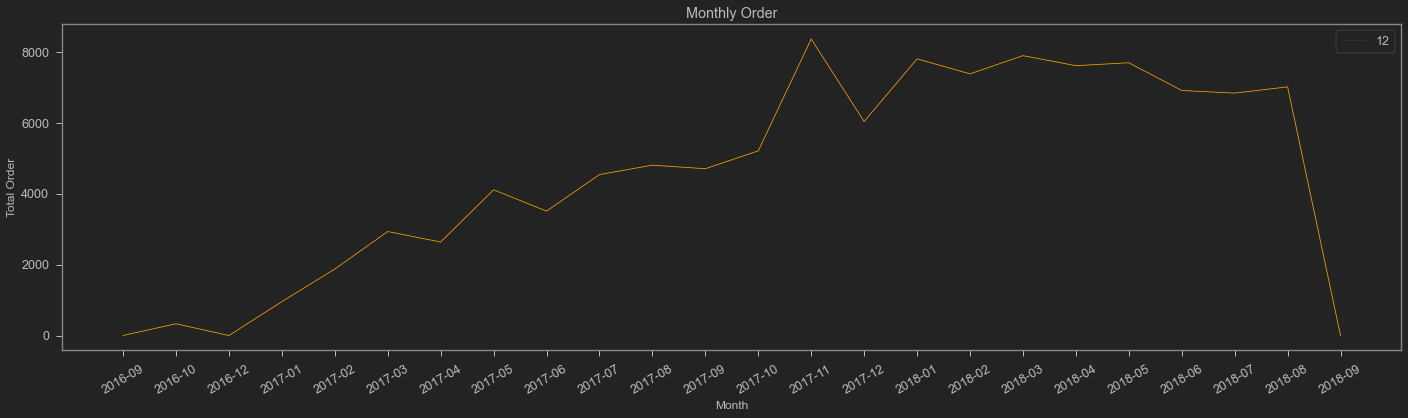

In [53]:
plt.figure(figsize=(24,6))
sns.lineplot(x= monthly_order['year_month'], y= monthly_order['order'],  size=12, color= 'orange')
plt.title('Monthly Order')
plt.xticks(rotation=30)
plt.xlabel('Month', size=12)
plt.ylabel('Total Order', size=12)
plt.show()

In [54]:
daily_order = data.groupby(data['order_purchase_timestamp'].dt.day).count()['order_id'].reset_index()
daily_order.columns = ['date', 'order']
daily_order['date'] = daily_order['date'].astype('str')
daily_order.head()

,date,order
0,1,3430
1,2,3538
2,3,3483
3,4,3713
4,5,3825


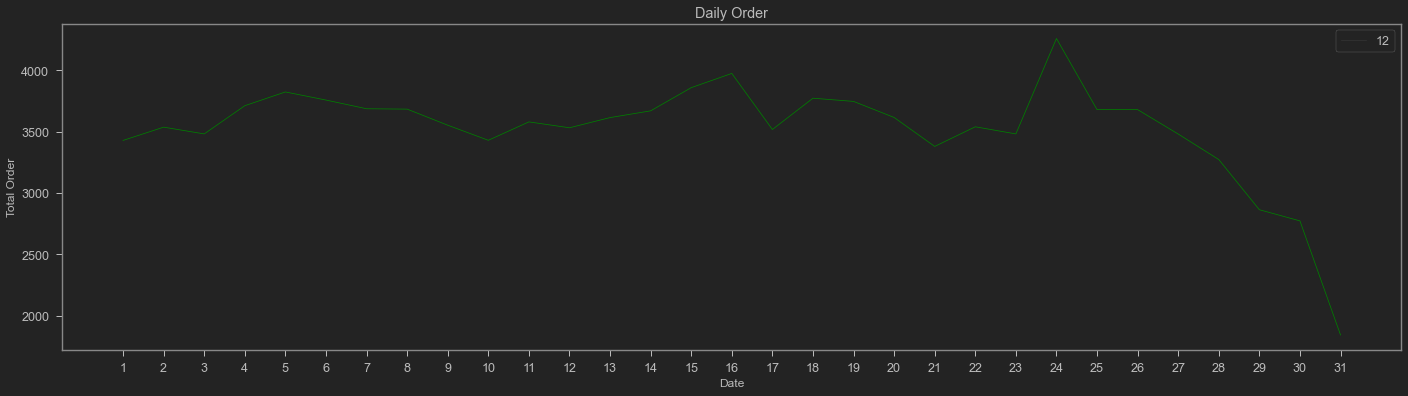

In [55]:
plt.figure(figsize=(24,6))
sns.lineplot(x= daily_order['date'], y= daily_order['order'],  size=12, color= 'green')
plt.title('Daily Order')
plt.xlabel('Date', size=12)
plt.ylabel('Total Order', size=12)
plt.show()

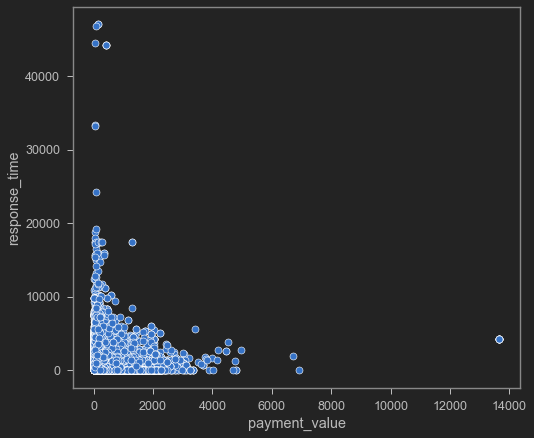

In [56]:
sns.scatterplot(x= 'payment_value', y='response_time', data=data)
plt.show()

In [57]:
data['review_score'] = data['review_score'].astype('float')

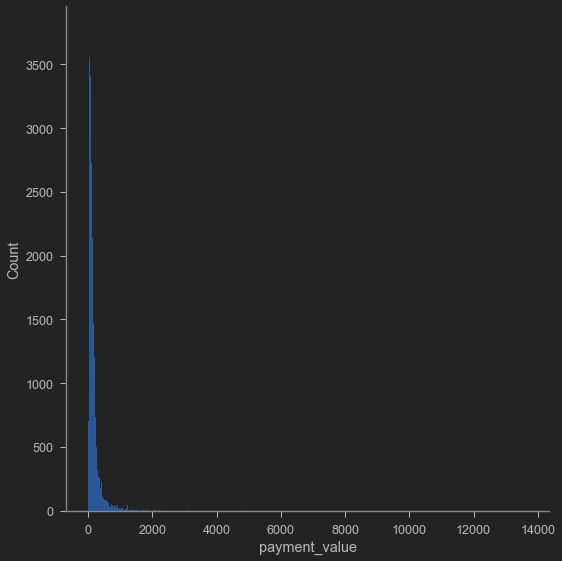

In [58]:
sns.displot(data['payment_value'], height=8)
plt.show()

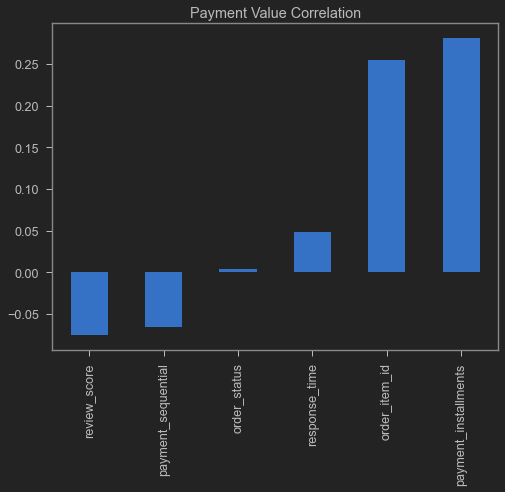

In [59]:
plt.figure(figsize=(8,6))
data.corr()['payment_value'].sort_values().drop('payment_value').plot(kind='bar')
plt.title('Payment Value Correlation')
plt.show()

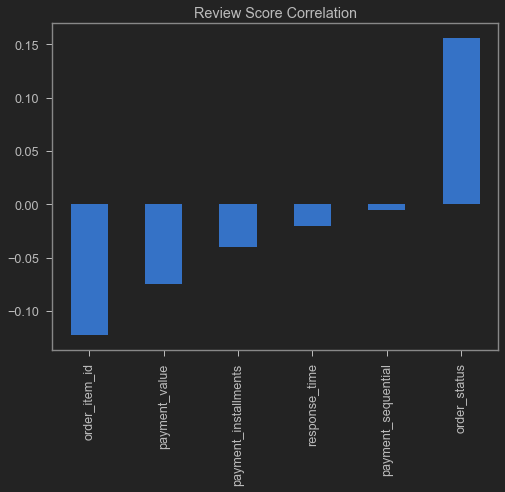

In [60]:
plt.figure(figsize=(8,6))
data.corr()['review_score'].sort_values().drop('review_score').plot(kind='bar')
plt.title('Review Score Correlation')
plt.show()

In [61]:
data = data[(data['payment_value'] > 0) & (data['payment_value'] < 1000)]

In [62]:
data.describe()

,order_status,payment_sequential,payment_installments,payment_value,review_score,order_item_id,response_time
count,106614.000000,107721.000000,107721.00000,107721.000000,107721.000000,107721.000000,107710.000000
mean,0.990095,1.095432,2.89276,149.807908,4.071927,1.177440,620.147598
std,0.099030,0.744936,2.72356,144.389682,1.355815,0.615121,1278.178211
min,0.000000,1.000000,0.00000,0.010000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,1.00000,59.960000,4.000000,1.000000,12.916667
50%,1.000000,1.000000,1.00000,106.200000,5.000000,1.000000,20.666667
75%,1.000000,1.000000,4.00000,183.470000,5.000000,1.000000,873.816667
max,1.000000,29.000000,24.00000,999.680000,5.000000,21.000000,47042.733333


In [63]:
# data.to_csv('sales.csv', index= True)

In [64]:
data.head()

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_state,payment_sequential,payment_type,payment_installments,payment_value,review_score,order_item_id,seller_id,product_category,response_time
0,e481f51cbdc54678b7cc49136f2d6af7,1.0,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,SP,1,credit_card,1,18.12,4.0,1,3504c0cb71d7fa48d967e0e4c94d59d9,housewares,10.700000
1,e481f51cbdc54678b7cc49136f2d6af7,1.0,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,SP,3,voucher,1,2.00,4.0,1,3504c0cb71d7fa48d967e0e4c94d59d9,housewares,10.700000
2,e481f51cbdc54678b7cc49136f2d6af7,1.0,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,SP,2,voucher,1,18.59,4.0,1,3504c0cb71d7fa48d967e0e4c94d59d9,housewares,10.700000
3,128e10d95713541c87cd1a2e48201934,1.0,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28,SP,1,credit_card,3,37.77,4.0,1,3504c0cb71d7fa48d967e0e4c94d59d9,housewares,95.750000
4,bfc39df4f36c3693ff3b63fcbea9e90a,1.0,2017-10-23 23:26:46,2017-10-25 02:14:11,2017-10-27 16:48:46,2017-11-07 18:04:59,2017-11-13,SC,1,boleto,1,44.09,3.0,1,3504c0cb71d7fa48d967e0e4c94d59d9,housewares,1607.416667
